In [13]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sys
import time
%matplotlib inline

import iirrational.v1
import iirrational.plots
from iirrational.testing import iirrational_data
from iirrational import TF_utilities

(direct = 9.860e+00, Psvd= 9.860e+00, Zsvd= 9.860e+00)
LINEAR Final Residuals:  4.00333828587
(direct = 5.185e+00, Psvd= 5.185e+00, Zsvd= 5.185e+00)
LINEAR Final Residuals:  3.94254006896
Using current
Cleared  zero (-6.95185918332+0j)
Cleared  zero (-0.794031103896+0j)
Initial Order: (Z= 18, P= 20, Z-P= -2)
TRIPLETS (rat = 0.999654217906, pre = 0.967053811201, mid = 0.967053810303, post = 0.965741455278
N:  2
RATIO:  4.20524394121
fit NOT improved from pair at 1.04752063708
RATIO:  4.20524219905
fit NOT improved from pair at 2.04575857798
FINAL RESIDUALS 0.963860736137
(array([ 0.99981098 +2.99693651e-05j,  0.99981098 -2.99693651e-05j,
        0.99997997 +2.10179223e-04j,  0.99997997 -2.10179223e-04j]), array([ 0.99998418+0.j        ,  0.99997826+0.j        ,
        0.99999815+0.00019154j,  0.99999815-0.00019154j,
        0.99998102+0.00057434j,  0.99998102-0.00057434j]), 3.6633737489995101e-08)


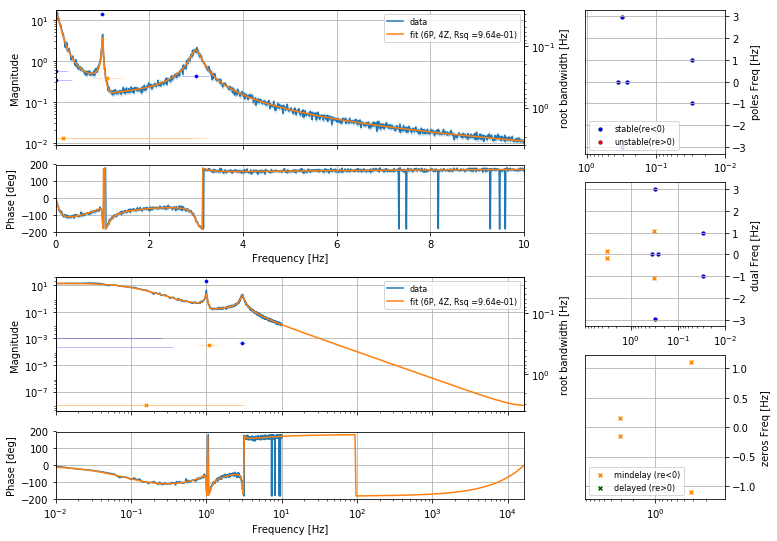

In [2]:
dataset = iirrational_data('simple2')
fit = iirrational.v1.data2filter(
    data = dataset.data,
    F_Hz = dataset.F_Hz,
    SNR  = dataset.SNR,
    F_nyquist_Hz = 16384,
)

#see the ZPK generated (Z-domain with the provided Nyquist frequency)
print(fit.fitter.ZPK)

#plot the output
ax = iirrational.plots.plot_fitter_flag(fit.fitter)

In [3]:
Z, P, K = fit.fitter.ZPK
print 'zeros:'
for z in Z:
    print z
print 'poles:'
for p in P:
    print p
print 'gain:'
print K

zeros:
(0.999810977777+2.99693650834e-05j)
(0.999810977777-2.99693650834e-05j)
(0.999979966262+0.00021017922303j)
(0.999979966262-0.00021017922303j)
poles:
(0.999984184096+0j)
(0.99997825755+0j)
(0.999998147339+0.000191535544726j)
(0.999998147339-0.000191535544726j)
(0.999981017922+0.000574344132682j)
(0.999981017922-0.000574344132682j)
gain:
3.663373749e-08


In [4]:
# Get data from the fit.fitter
ff2 = fit.fitter.F_Hz  # iirational freq vector
# hh = fit.fitter.xfer_fit
hh = fit.fitter.transfer_generate() # generate the TF from the fit 
fitData = fit.fitter.data # data used to fit
nyquist = fit.fitter.F_nyquist_Hz

[-6.19386549+0.98222182j -6.19386549-0.98222182j -0.65574174+6.88729066j
 -0.65574174-6.88729066j]
[-0.51825553 +0.j         -0.71245660 +0.j         -0.06010692 +6.27624828j
 -0.06010692 -6.27624828j -0.61660003+18.82046372j -0.61660003-18.82046372j]
39.3323860743


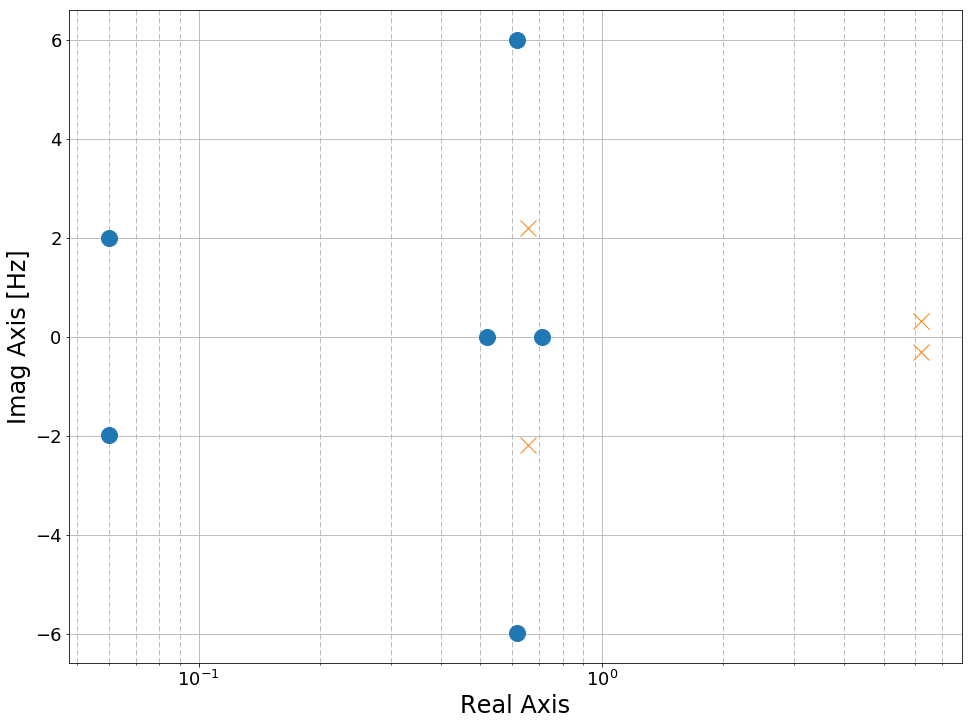

In [42]:
# Attempt to recreate zeros poles plot from above
poles_Hz = nyquist*(1.0-P)
zeros_Hz = nyquist*(1.0-Z)

zeros, poles, gain = TF_utilities.ZtoS(fit.fitter.ZPK, fit.fitter.F_nyquist_Hz, 1.0)
zeros = 2.0*np.pi * np.array(zeros)
poles = 2.0*np.pi * np.array(poles)
gain = 4.0*np.pi**2 * gain

print zeros
print poles
print gain

fig = plt.figure(figsize=(16,12))
ax = plt.gca()
ax.plot(-np.real(poles), np.imag(poles)/np.pi, 'o', ms=16)
ax.plot(-np.real(zeros), np.imag(zeros)/np.pi, 'x', ms=16)
ax.set_xscale("log")
ax.grid(True)
ax.grid(which='minor', ls='--')

ax.tick_params(axis='both', labelsize=18)
ax.set_xlabel('Real Axis', fontsize=24)
ax.set_ylabel('Imag Axis [Hz]', fontsize=24)

plt.show()

In [43]:
import scipy.signal as sig

zeroScaler = -2.0
poleScaler = -2.0
gainScaler = 4.0 * nyquist**2

testLTI2 = sig.ZerosPolesGain(zeroScaler * zeros_Hz, poleScaler * poles_Hz, gainScaler * K)
print testLTI2
testLTI3 = sig.ZerosPolesGain(zeros, poles, gain)
print testLTI3

ff = np.logspace(-2, 1, 1000000)
ww, scipyMagdB2, scipyPhase2 = sig.bode(testLTI2, 2.0*np.pi*ff) # takes in w = rads/s, returned in dB and degrees...
ww, scipyMagdB3, scipyPhase3 = sig.bode(testLTI3, 2.0*np.pi*ff)

# Wrap the phase
scipyPhase2 = ( scipyPhase2 + 180.0) % (2 * 180.0 ) - 180.0
scipyPhase3 = ( scipyPhase3 + 180.0) % (2 * 180.0 ) - 180.0

ZerosPolesGainContinuous(
array([-6.19388021+0.98203616j, -6.19388021-0.98203616j,
       -0.65646552+6.88715278j, -0.65646552-6.88715278j]),
array([-0.51825553 +0.j        , -0.71245660 +0.j        ,
       -0.06070799 +6.27623673j, -0.06070799 -6.27623673j,
       -0.62200474+18.82010854j, -0.62200474-18.82010854j]),
39.335176112444522,
dt: None
)
ZerosPolesGainContinuous(
array([-6.19386549+0.98222182j, -6.19386549-0.98222182j,
       -0.65574174+6.88729066j, -0.65574174-6.88729066j]),
array([-0.51825553 +0.j        , -0.71245660 +0.j        ,
       -0.06010692 +6.27624828j, -0.06010692 -6.27624828j,
       -0.61660003+18.82046372j, -0.61660003-18.82046372j]),
39.332386074309696,
dt: None
)


In [44]:
# define a converter from dB to mag
def dB2Mag(x):
    return 10**(x/20.0)

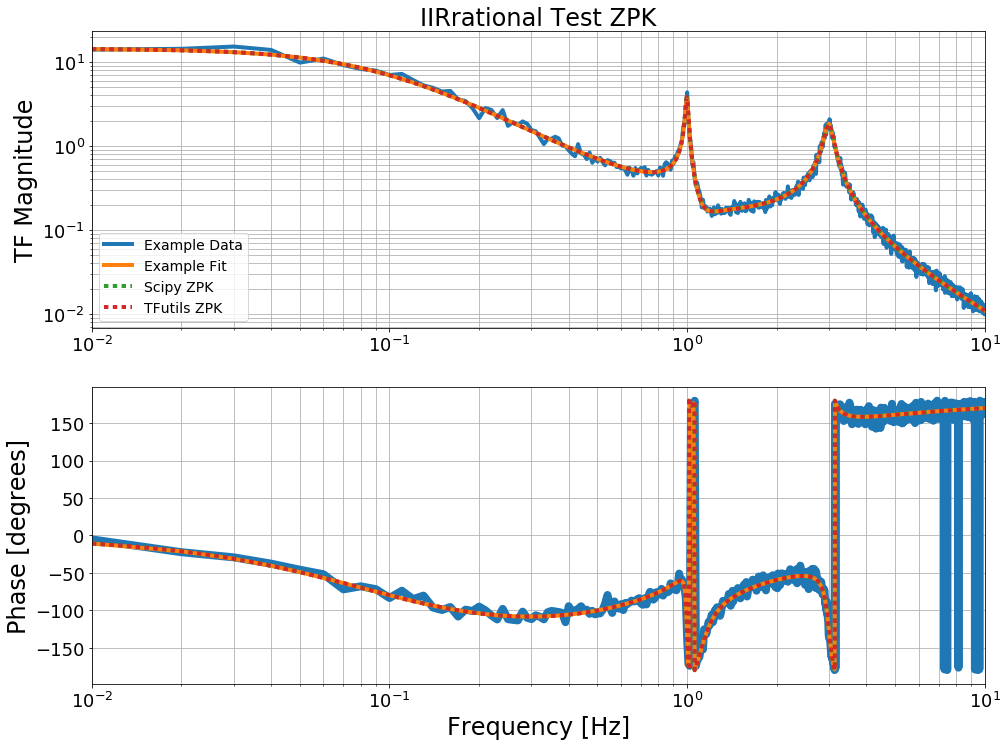

In [45]:
fig = plt.figure(figsize=(16,12))
s1 = plt.subplot(211)
s2 = plt.subplot(212)

s1.loglog(ff2, np.abs(fitData), label='Example Data', lw=4)
s1.loglog(ff2, np.abs(hh), label='Example Fit', lw=4)
s1.loglog(ff, dB2Mag(scipyMagdB2), label='Scipy ZPK', lw=4, ls=':')
s1.loglog(ff, dB2Mag(scipyMagdB3), label='TFutils ZPK', lw=4, ls=':')

s2.semilogx(ff2, 180.0/np.pi*np.angle(fitData), lw=8)
s2.semilogx(ff2, 180.0/np.pi*np.angle(hh), lw=4)
s2.semilogx(ff, scipyPhase2, lw=4, ls=':')
s2.semilogx(ff, scipyPhase3, lw=4, ls=':')

s1.set_ylabel('TF Magnitude', fontsize=24)
s1.set_title('IIRrational Test ZPK', fontsize=24)
s2.set_xlabel('Frequency [Hz]', fontsize=24)
s2.set_ylabel('Phase [degrees]', fontsize=24)

s1.set_xlim([min(ff2), max(ff2)])
s2.set_xlim([min(ff2), max(ff2)])

s1.grid(which='both')
s2.grid(which='both')

s1.tick_params(axis='both', labelsize=18)
s2.tick_params(axis='both', labelsize=18)

s1.legend(loc='lower left', fontsize=14)
plt.show()